<a href="https://colab.research.google.com/github/tusharkhanna575/delivery-data-analysis/blob/main/Delivery_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Intern at MediFleet

**Description:** https://docs.google.com/document/d/1gToh1JIAK9rdB-VUp6hhCc16k6hOo0I9TwfIk-nm-PQ/

**Dataset Link:** https://drive.google.com/file/d/1Skzy7VVoqmM9QpdfxjxJKnmTeLOBH3Yg/view




**Dataset Details:**
- *Dataset*: "`delivery_data.csv`"
- *Columns*:
  - `Order_ID` (Unique identifier for each delivery order)
  - `Date` (Date of the delivery)
  - `Delivery_Status` (Status of the delivery - Delivered, In Transit, Failed, etc.)
  - `Delivery_Time` (Time taken for the delivery in minutes)
  - `Delivery_Cost` (Cost of each delivery in INR)
  - `Customer_Rating` (Rating given by the customer for the delivery service)
  - `Rider_ID` (Unique identifier for each delivery rider)


Tasks:
1. Clean the dataset and handle any missing or erroneous data.
2. Calculate the average delivery time and cost for each month.
3. Identify the top-performing delivery riders based on their average delivery time and customer ratings.
4. Analyze the correlation between delivery time and customer ratings.
5. Create data visualizations to present your findings.


# Task - I
## Clean the dataset and handle any missing or erroneous data.

It can achieved by -
1. Import the CSV file into Python using the `pandas` library. Check for any missing values in the dataset.
2. If there are missing values, fill them in with a default value or drop the rows with missing values.
3. Check for any erroneous data in the dataset. This could include data that is out of range, invalid, or inconsistent.
4. If any erroneous data found, either correct it or remove it from the dataset.

In [9]:
# mounting google drive into colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
df = pd.read_csv("/content/delivery_data.csv"())

In [12]:
# dataset overview and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         10000 non-null  object 
 1   Date             10000 non-null  object 
 2   Delivery_Status  10000 non-null  object 
 3   Delivery_Time    10000 non-null  int64  
 4   Delivery_Cost    10000 non-null  float64
 5   Customer_Rating  10000 non-null  int64  
 6   Rider_ID         10000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [13]:
# checking sub dataset
df.head(10)

,Order_ID,Date,Delivery_Status,Delivery_Time,Delivery_Cost,Customer_Rating,Rider_ID
0,ORDER1,2023-09-27,Failed,119,64.46,4,RIDER1
1,ORDER2,2023-08-21,Failed,73,94.63,4,RIDER2
2,ORDER3,2023-11-22,Failed,49,324.06,3,RIDER3
3,ORDER4,2023-01-17,In Transit,83,463.06,1,RIDER4
4,ORDER5,2023-11-28,Delivered,21,469.34,5,RIDER5
5,ORDER6,2023-03-19,In Transit,43,189.25,5,RIDER6
6,ORDER7,2023-06-06,In Transit,41,469.30,2,RIDER7
7,ORDER8,2023-10-29,In Transit,16,97.39,3,RIDER8
8,ORDER9,2023-09-19,Failed,112,277.74,2,RIDER9
9,ORDER10,2023-08-25,In Transit,53,303.38,4,RIDER10


In [14]:
# checking for missing values
df.isnull().sum()

Order_ID           0
Date               0
Delivery_Status    0
Delivery_Time      0
Delivery_Cost      0
Customer_Rating    0
Rider_ID           0
dtype: int64

In [15]:
# cleaning null or missing values
df.dropna()

,Order_ID,Date,Delivery_Status,Delivery_Time,Delivery_Cost,Customer_Rating,Rider_ID
0,ORDER1,2023-09-27,Failed,119,64.46,4,RIDER1
1,ORDER2,2023-08-21,Failed,73,94.63,4,RIDER2
2,ORDER3,2023-11-22,Failed,49,324.06,3,RIDER3
3,ORDER4,2023-01-17,In Transit,83,463.06,1,RIDER4
4,ORDER5,2023-11-28,Delivered,21,469.34,5,RIDER5
...,...,...,...,...,...,...,...
9995,ORDER9996,2023-05-27,In Transit,58,213.70,5,RIDER9996
9996,ORDER9997,2023-10-13,Failed,68,117.75,2,RIDER9997
9997,ORDER9998,2023-01-08,In Transit,10,75.91,4,RIDER9998
9998,ORDER9999,2023-12-11,Delivered,65,283.77,4,RIDER9999


In [16]:
# Check for duplicate data
df.duplicated().sum()

0

In [19]:
# means all rows are unique


# Now,
# converting the date column to a proper date format
df["Date"] = pd.to_datetime(df["Date"])

In [34]:
# this means our data is now cleaned and error-free
print(df.shape)
df.head(10)

(10000, 7)


,Order_ID,Date,Delivery_Status,Delivery_Time,Delivery_Cost,Customer_Rating,Rider_ID
0,ORDER1,2023-09-27,Failed,119,64.46,4,RIDER1
1,ORDER2,2023-08-21,Failed,73,94.63,4,RIDER2
2,ORDER3,2023-11-22,Failed,49,324.06,3,RIDER3
3,ORDER4,2023-01-17,In Transit,83,463.06,1,RIDER4
4,ORDER5,2023-11-28,Delivered,21,469.34,5,RIDER5
5,ORDER6,2023-03-19,In Transit,43,189.25,5,RIDER6
6,ORDER7,2023-06-06,In Transit,41,469.30,2,RIDER7
7,ORDER8,2023-10-29,In Transit,16,97.39,3,RIDER8
8,ORDER9,2023-09-19,Failed,112,277.74,2,RIDER9
9,ORDER10,2023-08-25,In Transit,53,303.38,4,RIDER10


# Task - II
## Calculate the average delivery time and cost for each month.
It can be achieved by -
1. Aggregate the data by month. This will create a new DataFrame with one row for each month.
2. For each month, calculate the average delivery time and cost. Store the results in a new DataFrame.

In [21]:
# Extract month from the "Date" column
df["Month"] = df["Date"].dt.month

# Group by month and calculate the average delivery time and cost
monthly_stats = df.groupby("Month").agg({
    "Delivery_Time": "mean",
    "Delivery_Cost": "mean"
})

# showing monthly statistics
print(monthly_stats)

       Delivery_Time  Delivery_Cost
Month                              
1          64.147619     276.781810
2          67.178010     272.228717
3          64.792056     269.278084
4          65.029520     273.811451
5          65.771499     280.333378
6          63.349099     277.298255
7          65.364162     272.781179
8          66.475309     270.661321
9          66.046117     265.552549
10         64.104046     274.999075
11         66.302381     276.265833
12         65.151035     274.897272


# Task - III
## Identify the top-performing delivery riders based on their average delivery time and customer ratings.
It can be achieved by -
1. Aggregate the data by rider. This will create a new DataFrame with one row for each rider.
2. For each rider, calculate the average delivery time and customer rating.
3. Sort the DataFrame by the average delivery time and customer rating.
4. Keep the top n rows, where n is the number of riders you want to identify.


In [23]:
# Group by rider and calculate the average delivery time and customer ratings
rider_stats = df.groupby("Rider_ID").agg({
    "Delivery_Time": "mean",
    "Customer_Rating": "mean"
})

# Sort riders based on average delivery time and customer ratings
top_riders_by_time = rider_stats.sort_values(by="Delivery_Time", ascending=True)
top_riders_by_ratings = rider_stats.sort_values(by="Customer_Rating", ascending=False)

In [25]:
# Displaying data

n = int(input("Enter the number of riders you want to see : "))
print(f"Top riders by average delivery time: \n{top_riders_by_time.head(n)}")
print(f"Top riders by average customer rating: \n{top_riders_by_ratings.head(n)}")

Enter the number of riders you want to see : 10
Top riders by average delivery time: 
           Delivery_Time  Customer_Rating
Rider_ID                                 
RIDER6411           10.0              5.0
RIDER3198           10.0              1.0
RIDER5192           10.0              5.0
RIDER3205           10.0              5.0
RIDER3218           10.0              1.0
RIDER8459           10.0              4.0
RIDER7119           10.0              3.0
RIDER5570           10.0              1.0
RIDER9950           10.0              2.0
RIDER8425           10.0              4.0
Top riders by average customer rating: 
           Delivery_Time  Customer_Rating
Rider_ID                                 
RIDER7847           37.0              5.0
RIDER7557           88.0              5.0
RIDER7529           22.0              5.0
RIDER7535           99.0              5.0
RIDER4957           45.0              5.0
RIDER7537           51.0              5.0
RIDER7538           42.0          

# Task - IV
## Analyze the correlation between delivery time and customer ratings.
It can be achieved by -
1. Calculate the correlation coefficient between delivery time and customer ratings.
2. Interpret the correlation coefficient.




> *A correlation coefficient of 0 means that there is no correlation between delivery time and customer ratings. A correlation coefficient of 1 means that there is a perfect positive correlation between delivery time and customer ratings. A correlation coefficient of -1 means that there is a perfect negative correlation between delivery time and customer ratings.*







In [27]:
# Calculate the correlation between delivery time and customer ratings
correlation = df["Delivery_Time"].corr(df["Customer_Rating"])
print("Correlation between delivery time and customer ratings:", correlation)

Correlation between delivery time and customer ratings: 0.00984188818227901


> `it means both the factors delivery time and customer ratings depend on each other by a factor 9%, which is negligible.`

> ***Hence we can conclude that there is no correlation between delivery time and customer ratings.***

# Task - V
## Create data visualizations to present your findings.
It can be achieved by following visulizations -
1. Line graph representing average delivery time and cost over months
2. Bar graph representing top-performing riders by delivery time
3. Bar graph representing top-performing riders by customer ratings
4. Scatter plot for delivery time vs. customer ratings
5. Pie chart reflecting number of riders vs. their ratings
6. Histogram for distribution of delivery time
7. Violin plot for delivery time distribution by delivery status
8. Scatter plot with regression line for delivery time vs. delivery cost
9. Pairplot for pairwise relationships

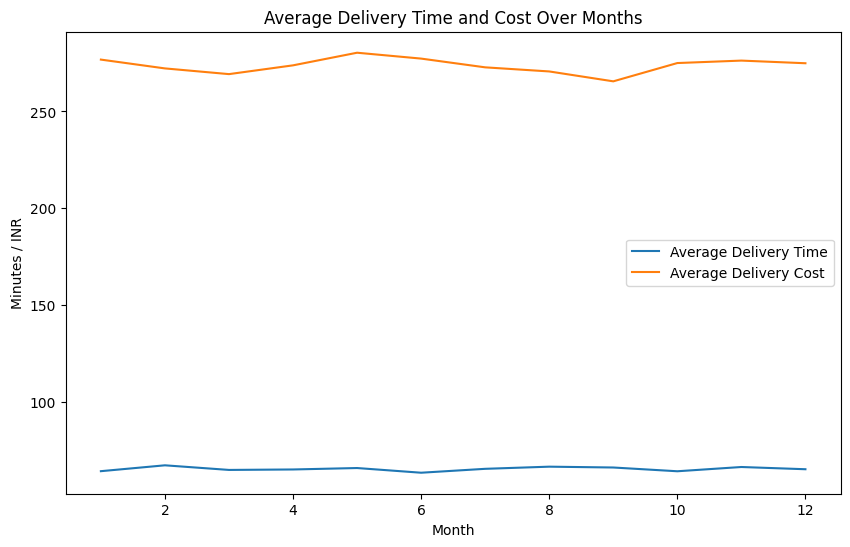

In [38]:
# Visualization 1: Line graph representing average delivery time and cost over months
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y="Delivery_Time", label="Average Delivery Time")
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y="Delivery_Cost", label="Average Delivery Cost")
plt.xlabel("Month")
plt.ylabel("Minutes / INR")
plt.title("Average Delivery Time and Cost Over Months")
plt.legend()
plt.show()

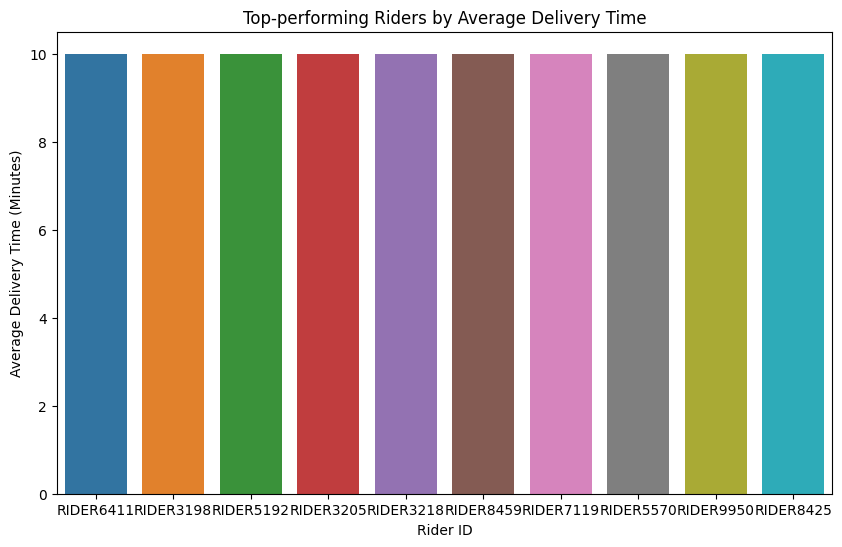

In [45]:
# Visualization 2: Top-performing riders by delivery time
plt.figure(figsize=(10, 6))
sns.barplot(data=top_riders_by_time.head(10), x=top_riders_by_time.head(10).index, y="Delivery_Time")
plt.xlabel("Rider ID")
plt.ylabel("Average Delivery Time (Minutes)")
plt.title("Top-performing Riders by Average Delivery Time")
plt.show()

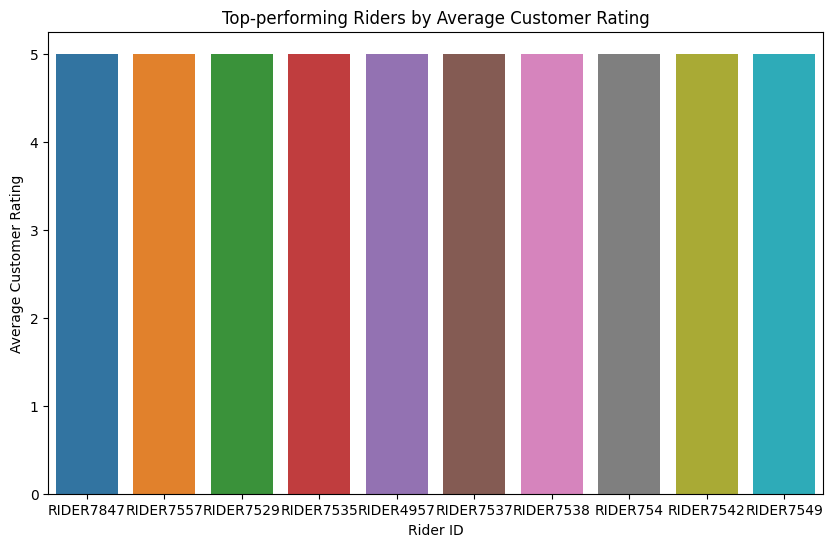

In [40]:
# Visualization 3: Top-performing riders by customer ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=top_riders_by_ratings.head(10), x=top_riders_by_ratings.head(10).index, y="Customer_Rating")
plt.xlabel("Rider ID")
plt.ylabel("Average Customer Rating")
plt.title("Top-performing Riders by Average Customer Rating")
plt.show()

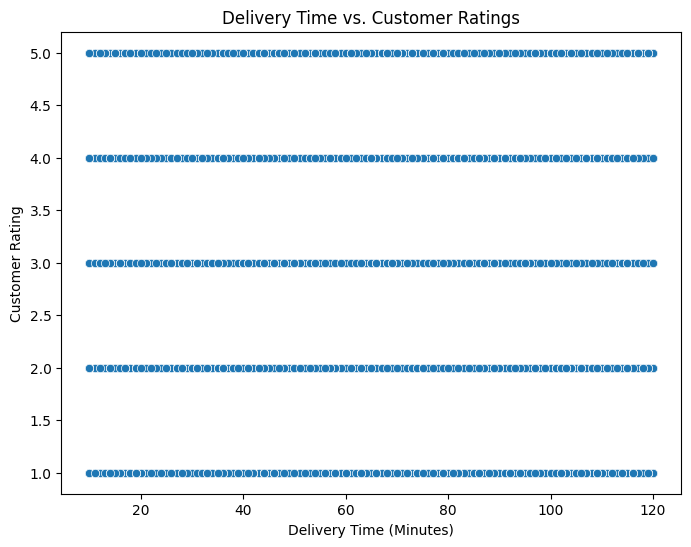

In [47]:
# Visualization 4: Scatter plot for delivery time vs. customer ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Delivery_Time", y="Customer_Rating")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Customer Rating")
plt.title("Delivery Time vs. Customer Ratings")
plt.show()

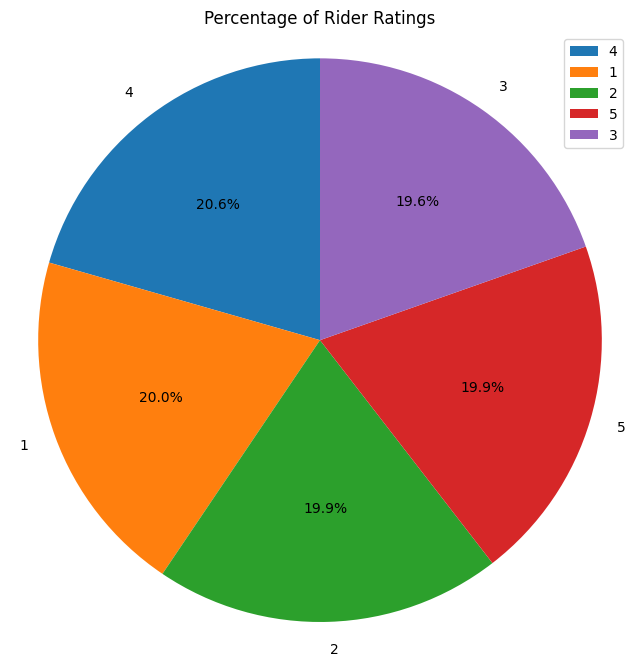

In [49]:
# Visualization 5: Number of riders vs. their ratings

# Count the occurrences of each rating
rating_counts = df["Customer_Rating"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Rider Ratings")
plt.legend()
plt.show()

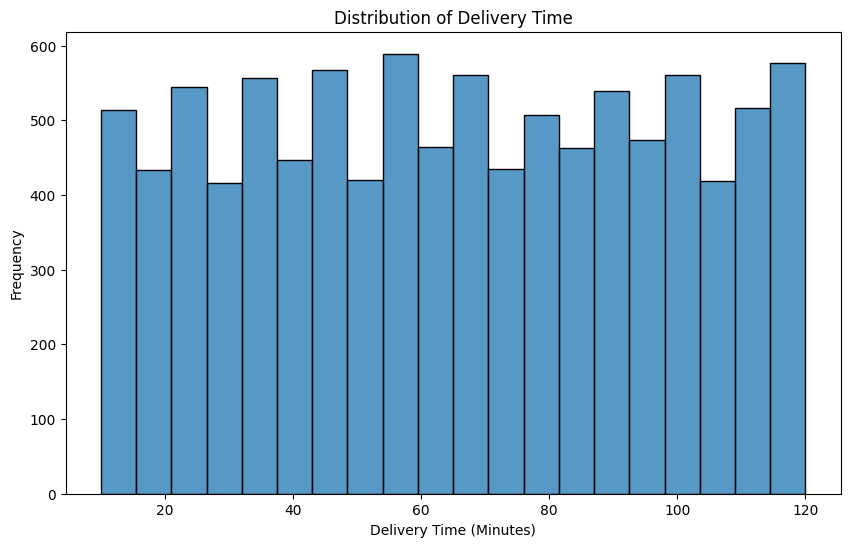

In [53]:
# Visualization 6: Histogram
# Histogram for distribution of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Delivery_Time", bins=20)
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

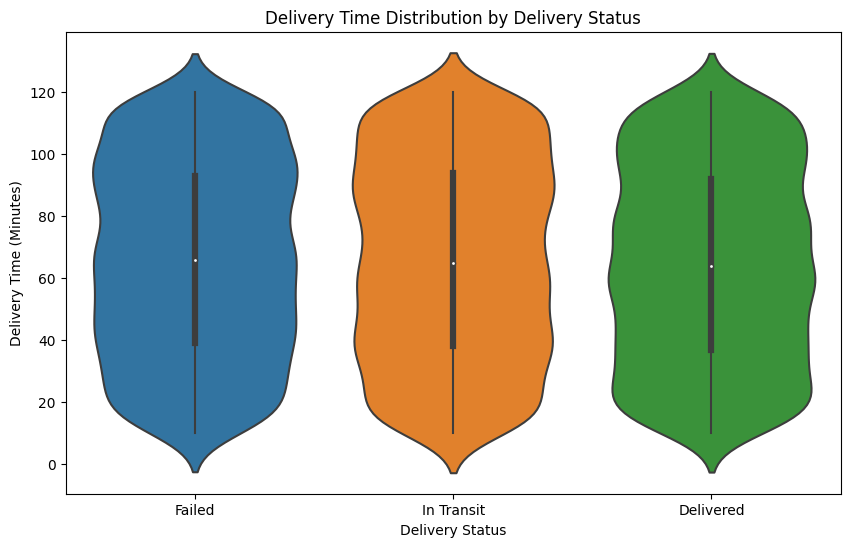

In [54]:
# Visualization 7: Violin plot for delivery time distribution by delivery status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Delivery_Status", y="Delivery_Time")
plt.xlabel("Delivery Status")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Delivery Time Distribution by Delivery Status")
plt.show()

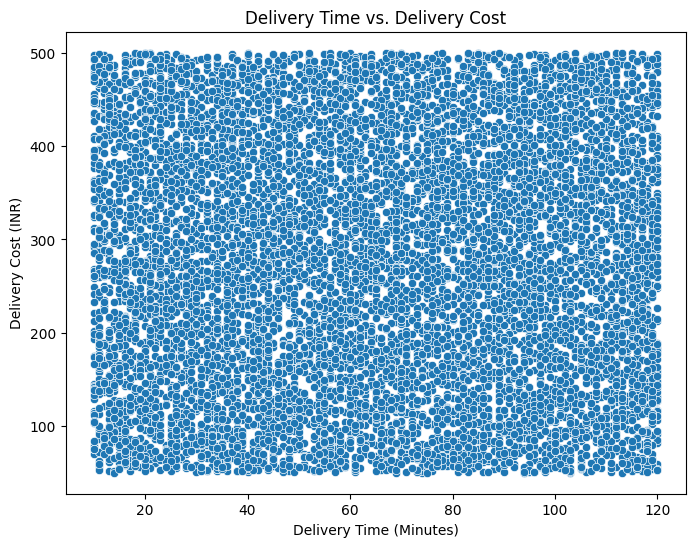

In [56]:
# Visualization 8: Scatter plot with regression line for delivery time vs. delivery cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Delivery_Time", y="Delivery_Cost")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Delivery Cost (INR)")
plt.title("Delivery Time vs. Delivery Cost")
plt.show()

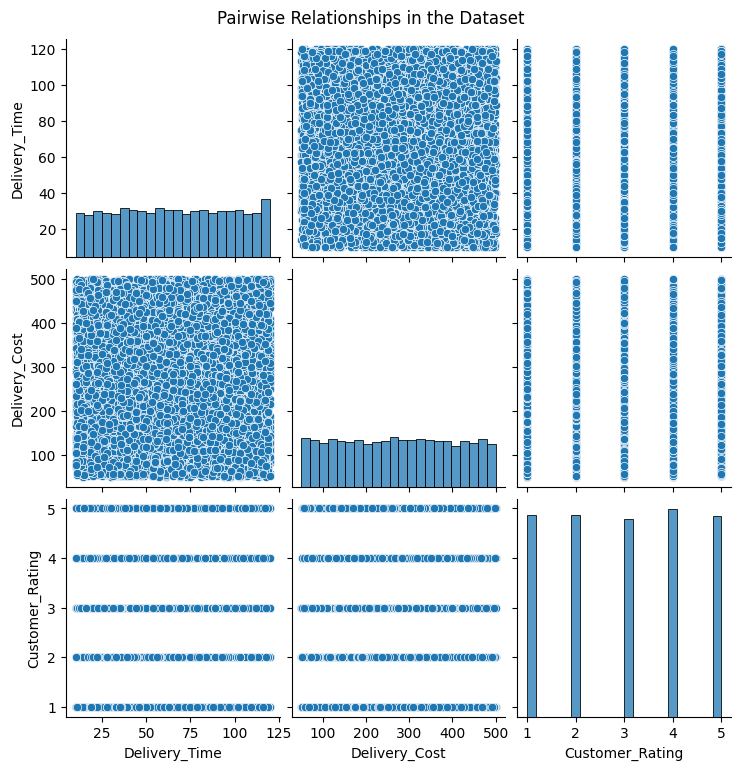

In [57]:
# Visualization 9: Pairplot for pairwise relationships
sns.pairplot(data=df, vars=["Delivery_Time", "Delivery_Cost", "Customer_Rating"])
plt.suptitle("Pairwise Relationships in the Dataset", y=1.02)
plt.show()